In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow.keras.layers import Input

from src.yolo3.model import *
from src.yolo3.detect import *

from src.utils.image import *
from src.utils.datagen import *
from src.utils.fixes import *

fix_tf_gpu()

## **Helper functions**

In [2]:
def prepare_model(approach):
    '''
    Prepare the YOLO model
    '''
    global input_shape, class_names, anchor_boxes, num_classes, num_anchors, model

    # shape (height, width) of the imput image
    input_shape = (416, 416)

    # class names
    if approach == 1:
        class_names = ['H', 'V', 'W']

    elif approach == 2:
        class_names  = ['W','WH','WV','WHV']

    elif approach == 3:
        class_names  = ['W']

    else:
        raise NotImplementedError('Approach should be 1, 2, or 3')

    # anchor boxes
    if approach == 1:
        anchor_boxes = np.array(
            [
            np.array([[ 76,  59], [ 84, 136], [188, 225]]) /32, # output-1 anchor boxes
            np.array([[ 25,  15], [ 46,  29], [ 27,  56]]) /16, # output-2 anchor boxes
            np.array([[ 5,    3], [ 10,   8], [ 12,  26]]) /8   # output-3 anchor boxes
            ],
            dtype='float64'
        )
    else:
        anchor_boxes = np.array(
            [
            np.array([[ 73, 158], [128, 209], [224, 246]]) /32, # output-1 anchor boxes
            np.array([[ 32,  50], [ 40, 104], [ 76,  73]]) /16, # output-2 anchor boxes
            np.array([[ 6,   11], [ 11,  23], [ 19,  36]]) /8   # output-3 anchor boxes
            ],
            dtype='float64'
        )

    # number of classes and number of anchors
    num_classes = len(class_names)
    num_anchors = anchor_boxes.shape[0] * anchor_boxes.shape[1]

    # input and output
    input_tensor = Input( shape=(input_shape[0], input_shape[1], 3) ) # input
    num_out_filters = ( num_anchors//3 ) * ( 5 + num_classes )        # output

    # build the model
    model = yolo_body(input_tensor, num_out_filters)

    # load weights
    weight_path = f'model-data\weights\pictor-ppe-v302-a{approach}-yolo-v3-weights.h5'
    model.load_weights( weight_path )

In [3]:
def get_detection(img):
    # save a copy of the img
    act_img = img.copy()

    # shape of the image
    ih, iw = act_img.shape[:2]

    # preprocess the image
    img = letterbox_image(img, input_shape)
    img = np.expand_dims(img, 0)
    image_data = np.array(img) / 255.

    # raw prediction from yolo model
    prediction = model.predict(image_data)

    # process the raw prediction to get the bounding boxes
    boxes = detection(
        prediction,
        anchor_boxes,
        num_classes,
        image_shape = (ih, iw),
        input_shape = (416,416),
        max_boxes = 10,
        score_threshold=0.3,
        iou_threshold=0.45,
        classes_can_overlap=False)

    # convert tensor to numpy
    boxes = boxes[0].numpy()

    # draw the detection on the actual image
    return draw_detection(act_img, boxes, class_names)

In [4]:
def plt_imshow(img):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')

## **Approach-1**

In [5]:
# prepare the model
prepare_model(approach=1)

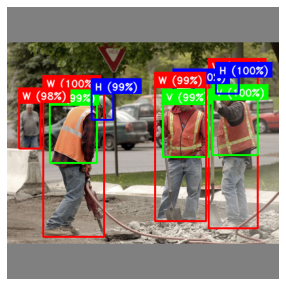

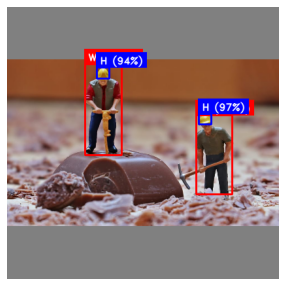

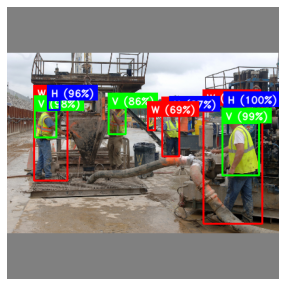

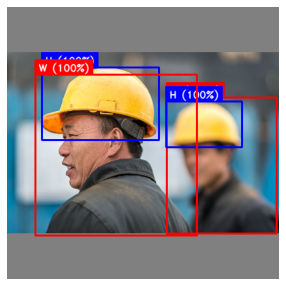

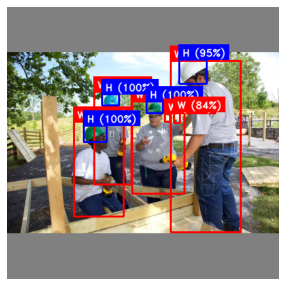

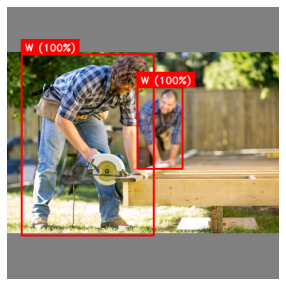

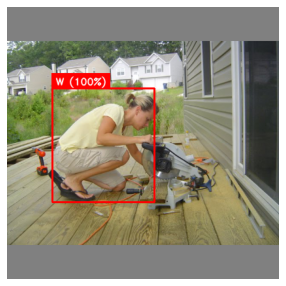

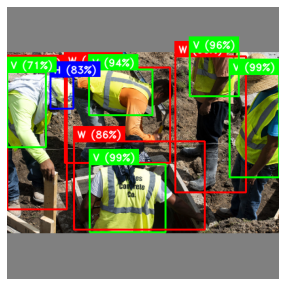

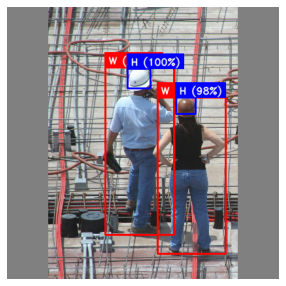

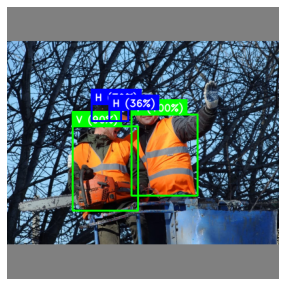

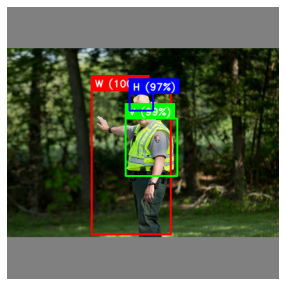

In [6]:
for i in range(11):
    # read the image
    img = cv2.imread( f'extras/sample-images/{i}.JPG' )

    # resize
    img = letterbox_image(img, input_shape)

    # get the detection on the image
    img = get_detection(img)

    # show the image
    plt_imshow(img[:, :, ::-1])

## **Approach-2**

In [5]:
# prepare the model
prepare_model(approach=2)

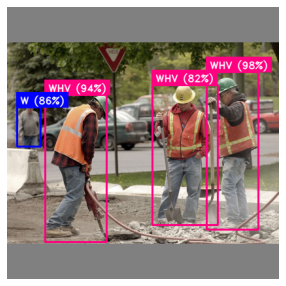

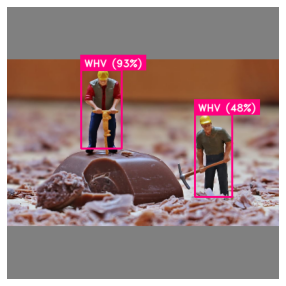

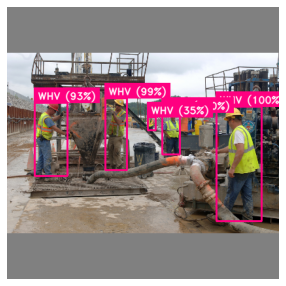

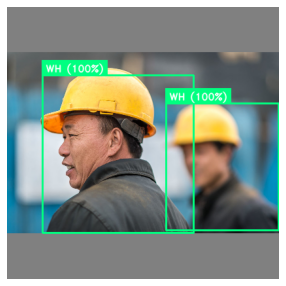

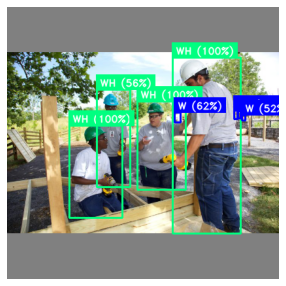

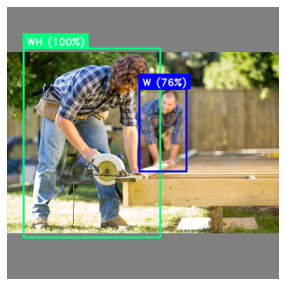

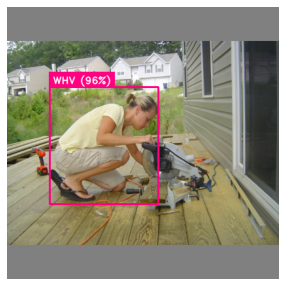

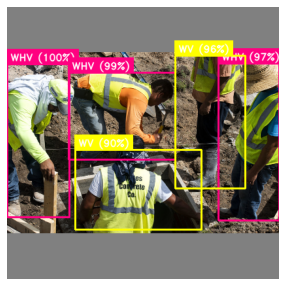

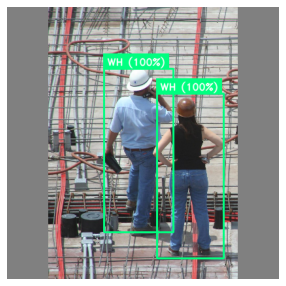

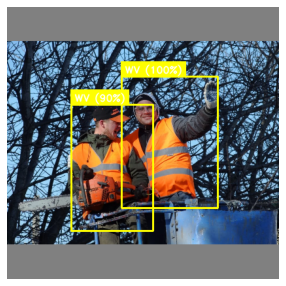

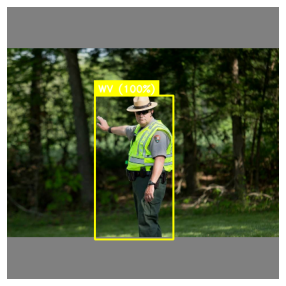

In [6]:
for i in range(11):
    # read the image
    img = cv2.imread( f'extras/sample-images/{i}.JPG' )

    # resize
    img = letterbox_image(img, input_shape)

    # get the detection on the image
    img = get_detection(img)

    # show the image
    plt_imshow(img[:, :, ::-1])

## **Approach-3**

In [5]:
# prepare the model
prepare_model(approach=3)

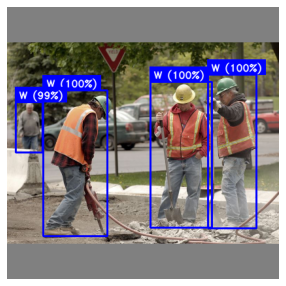

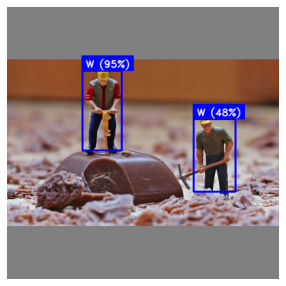

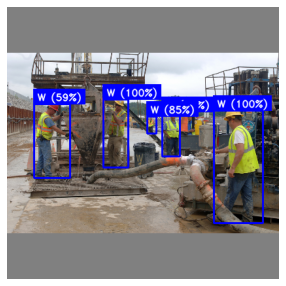

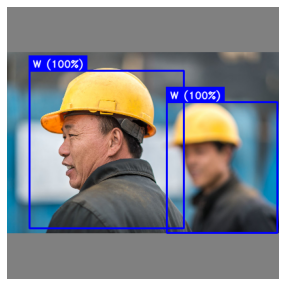

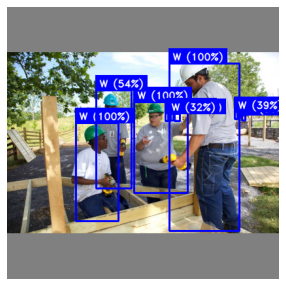

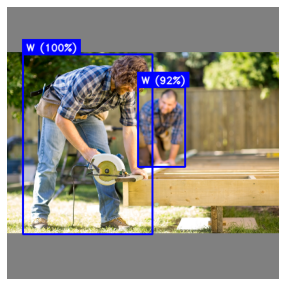

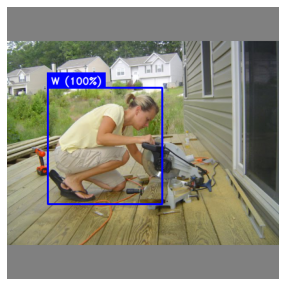

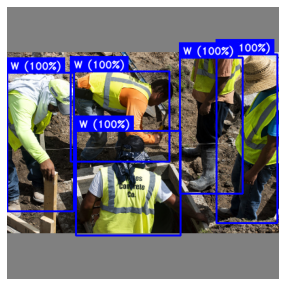

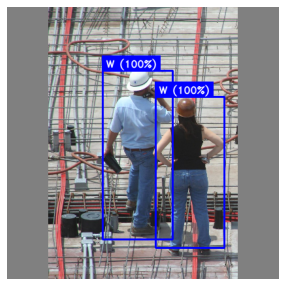

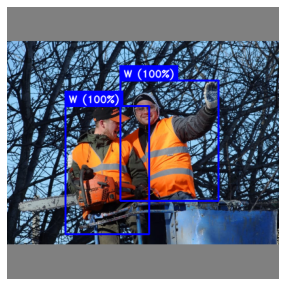

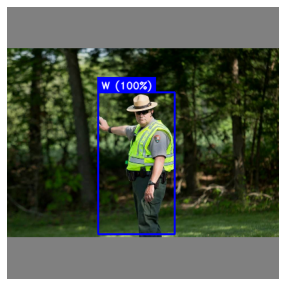

In [6]:
for i in range(11):
    # read the image
    img = cv2.imread( f'extras/sample-images/{i}.JPG' )

    # resize
    img = letterbox_image(img, input_shape)

    # get the detection on the image
    img = get_detection(img)

    # show the image
    plt_imshow(img[:, :, ::-1])